In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, confusion_matrix
import sqlite3
import matplotlib.pyplot as plt

In [54]:
# SQL-based Data Retrieval

conn = sqlite3.connect(':memory:')  # In-memory database
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.to_sql('heart_failure', conn, index=False, if_exists='replace')
query = "SELECT * FROM heart_failure"
data = pd.read_sql(query, conn)

In [55]:
# Check for missing values 
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [56]:
#Check all statistics 

data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [57]:
# Scale numerical features

scaler = StandardScaler()
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                      'platelets', 'serum_creatinine', 'serum_sodium', 'time']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [58]:
# Logistic Regression Prep

X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Train Logistic Regression Model

logistic_model = LogisticRegression(max_iter=1000, C=1.0)  
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

In [60]:
# Logistic Regression Evaluation

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("\nLogistic Regression Performance:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)



Logistic Regression Performance:
Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.77        60
weighted avg       0.83      0.80      0.79        60



In [61]:
# Confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[34  1]
 [11 14]]


In [62]:
#Improve performance evaluation using cross-validation.
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-validation scores: [0.85416667 0.875      0.91666667 0.77083333 0.74468085]
Mean CV Accuracy: 0.8322695035460992


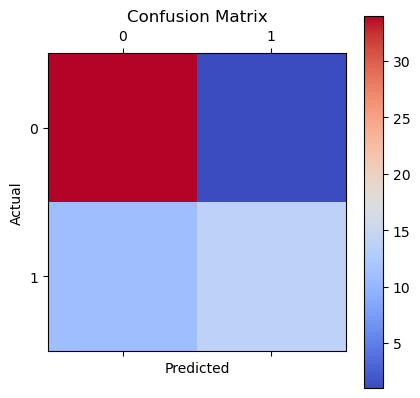

In [63]:
# Visualization: Confusion Matrix

plt.matshow(conf_matrix, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Linear Regression for Survival Time

In [64]:
# Linear Regression for Survival Time

X_linear = data.drop(columns=['time', 'DEATH_EVENT'])
y_linear = data['time']
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

In [65]:
linear_model = LinearRegression()
linear_model.fit(X_train_lin, y_train_lin)
y_pred_lin = linear_model.predict(X_test_lin)

In [66]:
# Linear Regression Evaluation

mse = mean_squared_error(y_test_lin, y_pred_lin)
r2 = r2_score(y_test_lin, y_pred_lin)
print("\nLinear Regression Performance:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Linear Regression Performance:
Mean Squared Error: 0.9324050080710351
R-squared: -0.02042730050263253


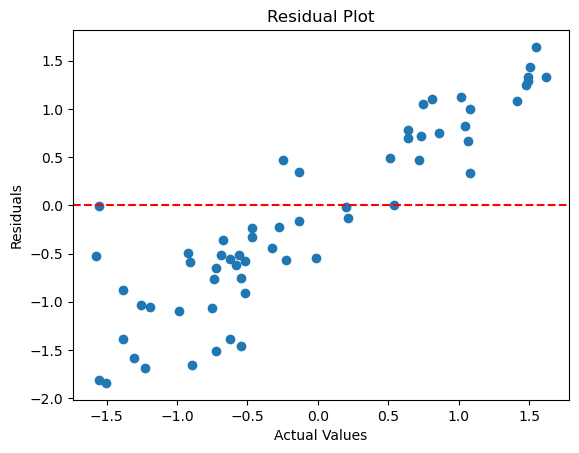

In [67]:
# Visualization: Residual Plot

residuals = y_test_lin - y_pred_lin
plt.scatter(y_test_lin, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()

In [68]:
#Optimize model performance by tuning hyperparameters.
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1}


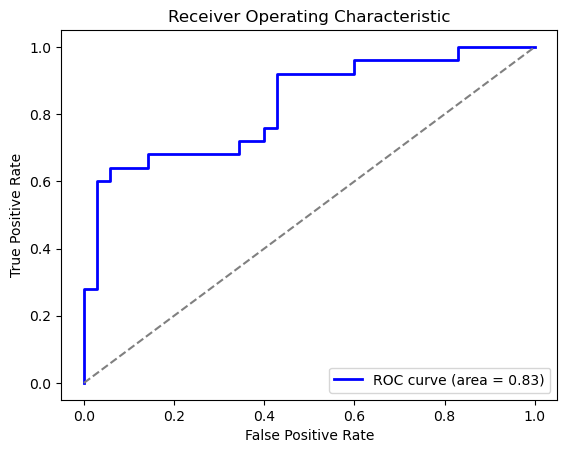

In [69]:
#generates an ROC (Receiver Operating Characteristic) curve and 
# calculates the AUC (Area Under the Curve) to evaluate the performance of my
#  logistic regression model.
from sklearn.metrics import roc_curve, auc

y_prob = logistic_model.predict_proba(X_test)[:, 1]  # Probability estimates
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

1. Understanding the Graph:
X-axis (False Positive Rate - FPR):
This represents the proportion of negatives (0s) that were incorrectly classified as positives (1s). In your case, these are the individuals who survived (DEATH_EVENT = 0) but were incorrectly predicted as having the event (death).
The lower this value, the fewer false positives your model is generating.
Y-axis (True Positive Rate - TPR):
This represents the proportion of positives (1s) that were correctly classified as positives (1s). In your case, these are the individuals who actually had a death event (DEATH_EVENT = 1) and were correctly predicted as having the event.
The higher this value, the better your model is at identifying the death event accurately.
The blue ROC curve:
Shows how well your model performs at various thresholds for classifying an individual as having a death event. The curve plots the trade-off between TPR and FPR for different threshold values (from 0 to 1).
The diagonal grey line:
Represents the performance of a random classifier. A random model, which doesn’t use any real predictive power, will have an ROC curve that follows this line.
Any curve that lies above the grey line indicates better-than-random performance.
2. What Does the AUC Tell You?
The AUC (Area Under the Curve) quantifies the overall performance of the model by calculating the area under the ROC curve.

AUC = 1: A perfect model with no false positives or false negatives.
AUC = 0.5: The model performs no better than random guessing (random classifier).
AUC between 0.5 and 1: The model has some ability to distinguish between the two classes (death vs survival). A higher AUC means the model is better at making correct predictions.
In your case, you can see from the label label='ROC curve (area = %0.2f)' % roc_auc on the graph what the exact AUC value is.

If AUC > 0.7, it indicates that your model is likely performing well in distinguishing between survivors and those who had the death event.
If AUC is around 0.5, the model might not have much discriminative ability, and its performance is similar to random guessing.
3. Interpreting Your Model’s ROC Curve:
Curve above the diagonal: If your ROC curve is well above the diagonal grey line, this indicates that your logistic regression model has some predictive power. The further the curve is from the diagonal, the better the model is at distinguishing between positive and negative cases.
Curvature: The steeper the initial curve (closer to the top-left corner), the better your model is at classifying the positives with a low false positive rate.
Area under the curve (AUC):
If your AUC is close to 1, this is a good indicator that the model is effectively predicting the death events. If it's closer to 0.5, it suggests that the model is either performing poorly or just randomly predicting the outcomes.
4. What Else Can You Do?
Threshold Tuning: The ROC curve allows you to evaluate your model’s performance at different thresholds for classification. By adjusting the threshold, you can either reduce false positives or false negatives, depending on your goal. For instance, if minimizing false negatives (predicting death events when they didn’t happen) is more important, you could adjust the threshold accordingly.

Compare Multiple Models: You could compare the ROC curves and AUC scores of different classification models (e.g., Logistic Regression, Decision Trees, SVMs, etc.) to see which one performs better in your case.

In [70]:
# Feature correlation analysis

correlations = data.corr()
time_correlation = correlations["time"].sort_values(ascending=False)
print("\nCorrelation with Survival Time:\n", time_correlation)


Correlation with Survival Time:
 time                        1.000000
serum_sodium                0.087640
ejection_fraction           0.041729
diabetes                    0.033726
platelets                   0.010514
creatinine_phosphokinase   -0.009346
sex                        -0.015608
smoking                    -0.022839
anaemia                    -0.141414
serum_creatinine           -0.149315
high_blood_pressure        -0.196439
age                        -0.224068
DEATH_EVENT                -0.526964
Name: time, dtype: float64


In [71]:
# Feature correlation analysis

correlations = data.corr()
time_correlation = correlations["DEATH_EVENT"].sort_values(ascending=False)
print("\nCorrelation with Death Event:\n", time_correlation)


Correlation with Death Event:
 DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


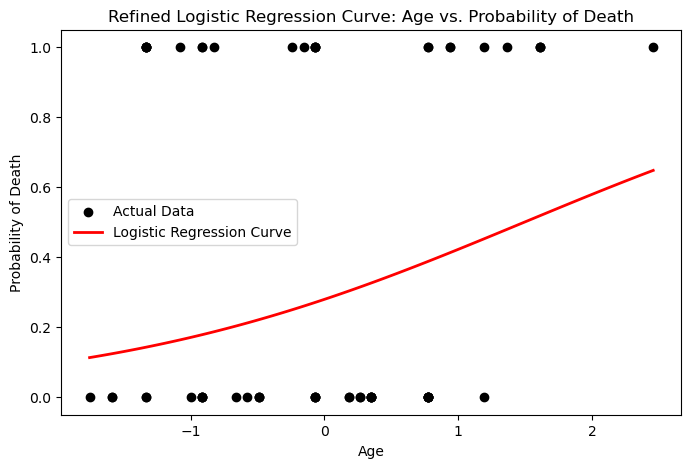

In [72]:
# Train a logistic regression model using only 'age'
X_age = X_train[['age']]  # Training set with only 'age'
X_age_test = X_test[['age']]  # Test set with only 'age'
model_age = LogisticRegression(max_iter=1000)
model_age.fit(X_age, y_train)

# Generate probabilities for a range of 'age'
age_range = np.linspace(X_age_test['age'].min(), X_age_test['age'].max(), 100).reshape(-1, 1)
probabilities_age = model_age.predict_proba(age_range)[:, 1]

# Plot the refined logistic regression curve
plt.figure(figsize=(8, 5))
plt.scatter(X_age_test, y_test, color='black', label='Actual Data')
plt.plot(age_range, probabilities_age, color='red', linewidth=2, label='Logistic Regression Curve')
plt.xlabel('Age')
plt.ylabel('Probability of Death')
plt.title('Refined Logistic Regression Curve: Age vs. Probability of Death')
plt.legend()
plt.show()
